In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import random
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:


df = image_dataset_from_directory(
    "my_dataset/",
    image_size = (28, 28),
    color_mode = "grayscale",
    label_mode = "int",
    shuffle = True
)

Found 760 files belonging to 26 classes.


In [13]:

X_all = []
y_all = []

for images, labels in df:
    X_all.append(images.numpy())
    y_all.append(labels.numpy())

X = np.concatenate(X_all)
y = np.concatenate(y_all)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test,y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

X_val = X_val / 255.0
X_train = X_train / 255.0 
X_test = X_test / 255.0 

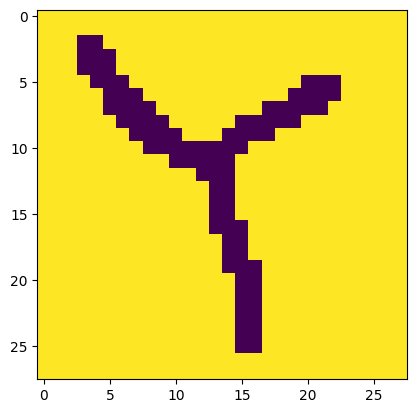

In [27]:
index = random.randint(0, len(y_test))
plt.imshow(X_test[index, : ])

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3, 3), input_shape = (28, 28, 1), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(26, activation = "softmax"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs = 100, validation_data= (X_val,y_val))

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9450 - loss: 0.1847 - val_accuracy: 0.8158 - val_loss: 0.7593
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9535 - loss: 0.1118 - val_accuracy: 0.8421 - val_loss: 0.7152
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9446 - loss: 0.1526 - val_accuracy: 0.8158 - val_loss: 0.7107
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9422 - loss: 0.1808 - val_accuracy: 0.8026 - val_loss: 0.6941
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9387 - loss: 0.1757 - val_accuracy: 0.8553 - val_loss: 0.5467
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9674 - loss: 0.0972 - val_accuracy: 0.8421 - val_loss: 0.8103
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9584 - loss: 0.1067 - val_accuracy: 0.8553 - val_loss: 0.5667
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9429 - loss: 0.1669 - val_accuracy: 0.8289 - v

In [21]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8834 - loss: 0.6901 


[0.771997332572937, 0.8684210777282715]

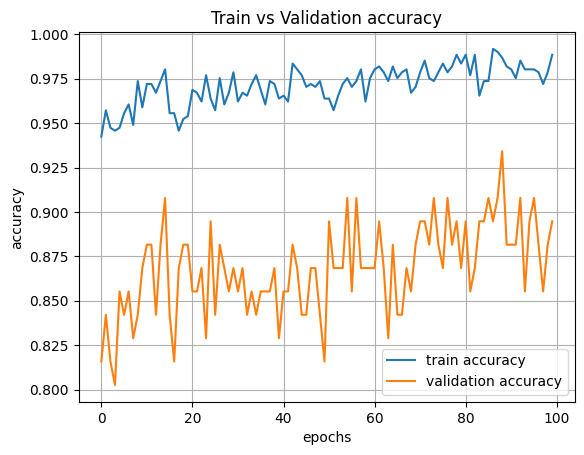

In [22]:
plt.plot(history.history["accuracy"], label = "train accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.title("Train vs Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


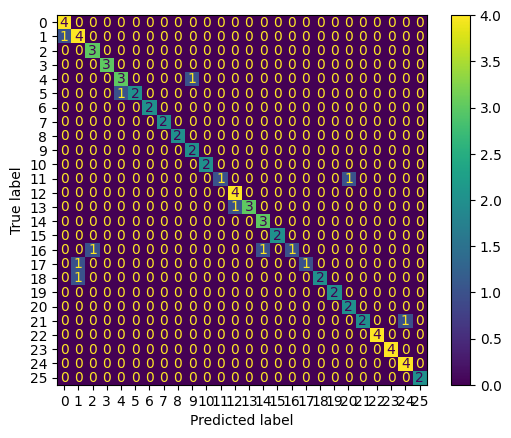

In [23]:
y_pred_probs = model.predict(X_test)  
y_pred_labels = np.argmax(y_pred_probs, axis=1)

if len(y_test.shape) > 1:
    y_true_labels = np.argmax(y_test, axis=1)
else:
    y_true_labels = y_test

cm = confusion_matrix(y_true_labels, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [24]:
model.save('my_model.keras')